Data Frame: 
   x1  x2   y
0   4   1   2
1   2   8 -14
2   1   0   1
3   3   2  -1
4   1   4  -7
5   6   7  -8

 Loss: 
0       4.000000
1     215.502400
2       2.825089
3      25.183696
4       2.703944
5      39.437509
6       0.079794
7      45.485374
8       0.414151
9       4.161373
10      0.658158
11      6.762233
12      0.000164
13      6.585837
14      0.045520
15      0.525677
16      0.099272
17      0.899490
18      0.001459
19      0.787665
20      0.003423
21      0.055453
22      0.011455
23      0.107461
Name: loss(SSE), dtype: float64


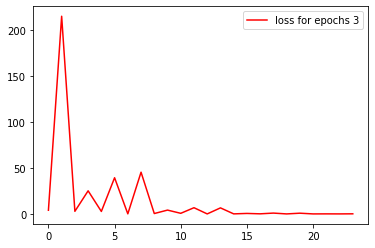

In [3]:
# Activity-Stochastic Gradient Descent 
# Create the log table containing these columns and fill out the table for 1 epoch for the dataset provided in the example below:
# https://towardsdatascience.com/step-by-step-tutorial-on-linear-regression-with-stochastic-gradient-descent-1d35b088a843

import pandas as pd
# creating a dataframe for the dataset
d = {'x1': [4, 2, 1,3,1,6], 'x2': [1, 8,0, 2,4,7], 'y': [2, -14, 1, -1, -7, -8]}
df = pd.DataFrame(data=d)
print ("Data Frame: ")
print(df)

# batch size =1, so we have 6 batches altogether. 
# We complete 1 epoch when the model has iterated through all the batches once.
 
# we are reporting : x1, x2, y, y_hat, (y- y_hat), w1, w2, b  ... assuming y_hat = w1x1 + w2x2 + b
# goal: find the best w (weight) and b (bias) values using Stochastic GD. 

# Initializing the weights 
w_1 = 0.0
w_2 = 0.0
b=0 
a = 0.01  # learning rate
data= []

for epoch in range(0,4):
    # Batch size = 1 , so we have 6 batches in 1 epoch: 
    for i in range(0, 6):  # the size of dataset is 6 (6 samples)
        x_1 = df.loc[i][0]
        x_2 = df.loc[i][1]
        y = df.loc[i][2]
        y_hat = (w_1*x_1) + (w_2*x_2) + b
        loss = pow((y - y_hat) , 2)
    
        data.append([x_1, x_2, y, y_hat, loss, (y - y_hat) ,w_1,w_2,b])
    
        # updated parameters
        w_1 = w_1 + a*(2* (y - y_hat) *x_1)
        w_2 = w_2 + a*(2*(y - y_hat)*x_2)
        b = b + a*(2* (y - y_hat)*1)
        # end of the ith batch
    
output = pd.DataFrame(data, columns=['x1', 'x2', 'y', 'y_hat', 'loss(SSE)' , 'y - y_hat' , 'w1', 'w2' , 'b'])

print("\n Loss: ")
print (output['loss(SSE)'])
import matplotlib.pyplot as plt
plt.plot(output['loss(SSE)'],'r-',label='loss for epochs '+ str(epoch) ) 
plt.legend()
plt.show()



In [4]:
output

,x1,x2,y,y_hat,loss(SSE),y - y_hat,w1,w2,b
0,4,1,2,0.000000,4.000000,2.000000,0.000000,0.000000,0.000000
1,2,8,-14,0.680000,215.502400,-14.680000,0.160000,0.040000,0.040000
2,1,0,1,-0.680800,2.825089,1.680800,-0.427200,-2.308800,-0.253600
3,3,2,-1,-6.018336,25.183696,5.018336,-0.393584,-2.308800,-0.219984
4,1,4,-7,-8.644367,2.703944,1.644367,-0.092484,-2.108067,-0.119617
5,6,7,-8,-14.279929,39.437509,6.279929,-0.059596,-1.976517,-0.086730
6,4,1,2,1.717522,0.079794,0.282478,0.693995,-1.097327,0.038869
7,2,8,-14,-7.255715,45.485374,-6.744285,0.716593,-1.091678,0.044518
8,1,0,1,0.356454,0.414151,0.643546,0.446822,-2.170763,-0.090367
9,3,2,-1,-3.039944,4.161373,2.039944,0.459693,-2.170763,-0.077497
